In [178]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import linregress
from sparse_ffn.moe import MoE
from sparse_ffn.controller import ControllerFFN
from sparse_ffn.pkm import PKM

In [33]:
def blimp_results(model_name, model_path):
    results = {'Name':None, 'Overall': None}
    correct = 0
    total = 0
    results_dir = os.path.join(model_path, 'zeroshot/')
    for subdir in os.listdir(results_dir):
        task_name = subdir.replace('_', ' ').title()
        task_dir = os.path.join(results_dir, subdir)
        pred_path = os.path.join(task_dir,'predictions.txt')
        num_pred = len(pd.read_csv(pred_path, sep="\t", header=0, index_col=0))
        eval_results_path = os.path.join(task_dir, 'eval_results.json')
        with open(eval_results_path, 'r') as json_file:
            data = json.load(json_file)
            eval_accuracy = data.get('eval_accuracy')
            results[task_name] = [eval_accuracy]
            total += num_pred
            correct += num_pred * eval_accuracy
    results["Name"] = [model_name.replace('_', ' ').title()]
    results["Overall"] = [correct/total]
    df = pd.DataFrame(results)
    return df

In [34]:
def blimp_results_all(path):
    dfs = []
    for subdir in os.listdir(path):
        dfs.append(blimp_results(subdir, os.path.join(path, subdir)))
    return pd.concat(dfs, ignore_index=True)

In [38]:
table = blimp_results_all('../../models/sparse_pretrained/')
table

,Name,Overall,Anaphor Agreement,Argument Structure,Binding,Control Raising,Determiner Noun Agreement,Ellipsis,Filler Gap,Hypernym,Irregular Forms,Island Effects,Npi Licensing,Qa Congruence Easy,Qa Congruence Tricky,Quantifiers,Subject Aux Inversion,Subject Verb Agreement,Turn Taking
0,Gpt Baseline,0.588985,0.818507,0.602449,0.655091,0.581529,0.626757,0.529446,0.570339,0.490698,0.662595,0.426756,0.440024,0.546875,0.393939,0.660484,0.730910,0.499548,0.560714
1,Gpt Cnt High,0.544106,0.728016,0.575291,0.590828,0.606054,0.580085,0.431293,0.608310,0.515116,0.551145,0.484305,0.397206,0.484375,0.436364,0.381504,0.618931,0.501716,0.610714
2,Gpt Cnt Low,0.538353,0.763804,0.547527,0.638172,0.583297,0.568019,0.471709,0.591503,0.519767,0.527735,0.423393,0.295627,0.406250,0.448485,0.504122,0.636253,0.511472,0.553571
3,Gpt Cnt Medium,0.588685,0.784765,0.583778,0.651677,0.575122,0.600504,0.431293,0.626050,0.511628,0.598473,0.455904,0.488916,0.468750,0.454545,0.691139,0.700659,0.495935,0.528571
4,Gpt Moe High,0.530768,0.726994,0.539161,0.565895,0.585064,0.544285,0.455543,0.563648,0.512791,0.537405,0.413303,0.379897,0.546875,0.406061,0.517517,0.655038,0.489431,0.467857
5,Gpt Moe Low,0.567430,0.634969,0.574564,0.616503,0.585506,0.582604,0.479215,0.617025,0.501163,0.598982,0.423019,0.433799,0.500000,0.393939,0.682895,0.642596,0.503523,0.596429
6,Gpt Moe Medium,0.552355,0.707055,0.543889,0.595132,0.599867,0.547335,0.409931,0.575475,0.488372,0.537405,0.467115,0.473884,0.406250,0.387879,0.624678,0.628202,0.493586,0.550000
7,Gpt Pkm High,0.569912,0.780164,0.559893,0.643218,0.602519,0.574516,0.466513,0.593838,0.490698,0.590840,0.482810,0.444428,0.515625,0.387879,0.636012,0.619175,0.515266,0.514286
8,Gpt Pkm Low,0.552149,0.758180,0.571048,0.587266,0.600530,0.575179,0.393187,0.592437,0.488372,0.600000,0.462631,0.352111,0.421875,0.466667,0.611283,0.623567,0.523758,0.564286
9,Gpt Pkm Medium,0.583929,0.796012,0.587294,0.605818,0.597879,0.600239,0.392610,0.626517,0.458140,0.652417,0.473468,0.434254,0.500000,0.503030,0.690366,0.715052,0.512195,0.589286


In [44]:
print(table.to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
Name & Overall & Anaphor Agreement & Argument Structure & Binding & Control Raising & Determiner Noun Agreement & Ellipsis & Filler Gap & Hypernym & Irregular Forms & Island Effects & Npi Licensing & Qa Congruence Easy & Qa Congruence Tricky & Quantifiers & Subject Aux Inversion & Subject Verb Agreement & Turn Taking \\
\midrule
Gpt Baseline & 0.59 & 0.82 & 0.60 & 0.66 & 0.58 & 0.63 & 0.53 & 0.57 & 0.49 & 0.66 & 0.43 & 0.44 & 0.55 & 0.39 & 0.66 & 0.73 & 0.50 & 0.56 \\
Gpt Cnt High & 0.54 & 0.73 & 0.58 & 0.59 & 0.61 & 0.58 & 0.43 & 0.61 & 0.52 & 0.55 & 0.48 & 0.40 & 0.48 & 0.44 & 0.38 & 0.62 & 0.50 & 0.61 \\
Gpt Cnt Low & 0.54 & 0.76 & 0.55 & 0.64 & 0.58 & 0.57 & 0.47 & 0.59 & 0.52 & 0.53 & 0.42 & 0.30 & 0.41 & 0.45 & 0.50 & 0.64 & 0.51 & 0.55 \\
Gpt Cnt Medium & 0.59 & 0.78 & 0.58 & 0.65 & 0.58 & 0.60 & 0.43 & 0.63 & 0.51 & 0.60 & 0.46 & 0.49 & 0.47 & 0.45 & 0.69 & 0.70 & 0.50 & 0.53 \\
Gpt Moe High & 0.53 & 0.73 & 0.54 & 0.57 & 0.59 & 0.54

In [104]:
def param_count(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    return sum([np.prod(p.size()) for p in model_parameters])

In [114]:
def total_param(name):
    if 'baseline' in name:
        return 256 * 4096 * 2 + 4096 + 256
    elif 'moe' in name:
        if 'high' in name:
            return param_count(MoE(256, 1023, 4, 1))
        elif 'medium' in name:
            return param_count(MoE(256, 1023, 4, 2))
        elif 'low' in name:
            return param_count(MoE(256, 1023, 4, 3))
            
    elif 'cnt' in name:
        if 'high' in name:
            return param_count(ControllerFFN(256, 16, 3968, 16))
        elif 'medium' in name:
            return param_count(ControllerFFN(256, 8, 4032, 32))
        elif 'low' in name:
            return param_count(ControllerFFN(256, 4, 4032, 64))

    elif 'pkm' in name:
        if 'high' in name:
            return param_count(PKM(256, 1024, 56, 14, 4))
        elif 'medium' in name:
            return param_count(PKM(256, 1024, 56, 28, 4))
        elif 'low' in name:
            return param_count(PKM(256, 1024, 56, 42, 4))
    

In [131]:
# validate param formula
print(total_param('cnt medium'))
print(256 * 4032 * 2 + 256 + 4032 + 256*256/32 + 256 * 4032 / 32)

2102976
2102976.0


In [127]:
def active_param(name):
    if 'baseline' in name:
        return 256 * 4096 * 2 + 4096 + 256
        
    elif 'moe' in name:
        if 'high' in name:
            return 1 * (2 * 1023 * 256 + 1023 + 256) + 2 * 4 * 256 # param_count(MoE(256, 1023, 4, 1))
        elif 'medium' in name:
            return 2 * (2 * 1023 * 256 + 1023 + 256) + 2 * 4 * 256
        elif 'low' in name:
            return 3 * (2 * 1023 * 256 + 1023 + 256) + 2 * 4 * 256
            
    elif 'cnt' in name:
        if 'high' in name:
            return 2 * 16 * 256 + 16 + 256 + 256**2 / 16 + 256 / 16 * 3968 # return param_count(ControllerFFN(256, 256/16, 3968, 16))
        elif 'medium' in name:
            return 2 * 32 * 256 + 32 + 256 + 256**2 / 32 + 256 / 32 * 4032 # param_count(ControllerFFN(256, 256/32, 4032, 32))
        elif 'low' in name:
            return 2 * 64 * 256 + 64 + 256 + 256**2 / 64 + 256 / 32 * 4032 # param_count(ControllerFFN(256, 256/64, 4032, 64))

    elif 'pkm' in name:
        if 'high' in name:
            return 4 * (1024 * 256 + 1024*56) + 14 * 256 # param_count(PKM(256, 1024, 56, 14, 4))
        elif 'medium' in name:
            return 4 * (1024 * 256 + 1024*56) + 28 * 256 # param_count(PKM(256, 1024, 56, 28, 4))
        elif 'low' in name:
            return 4 * (1024 * 256 + 1024*56) + 42 * 256 # param_count(PKM(256, 1024, 56, 42, 4))

In [124]:
def sparsity_ratio(name):
    return active_param(name)/total_param(name)

In [153]:
blimp_scores = blimp_results_all('../../models/sparse_pretrained/')[['Name','Overall']]
blimp_scores = blimp_scores.set_index('Name').T
blimp_scores = blimp_scores.rename(columns=str.lower)
sr = [sparsity_ratio(col) for col in blimp_scores.columns]
blimp_scores.loc['sparsity_ratio'] = sr

In [161]:
gpt_cols = blimp_scores.columns[blimp_scores.columns.to_series().apply(lambda x: 'gpt' in x )]
gpt_blimp = blimp_scores[gpt_cols]
roberta_cols = blimp_scores.columns[blimp_scores.columns.to_series().apply(lambda x: 'roberta' in x )]
roberta_blimp = blimp_scores[roberta_cols]

In [166]:
def sparsity_type(name):
    if 'moe' in name:
        return 'MoE'
    elif 'cnt' in name:
        return 'CNT'
    elif 'pkm' in name:
        return 'PKM'
    else:
        return 'Baseline'

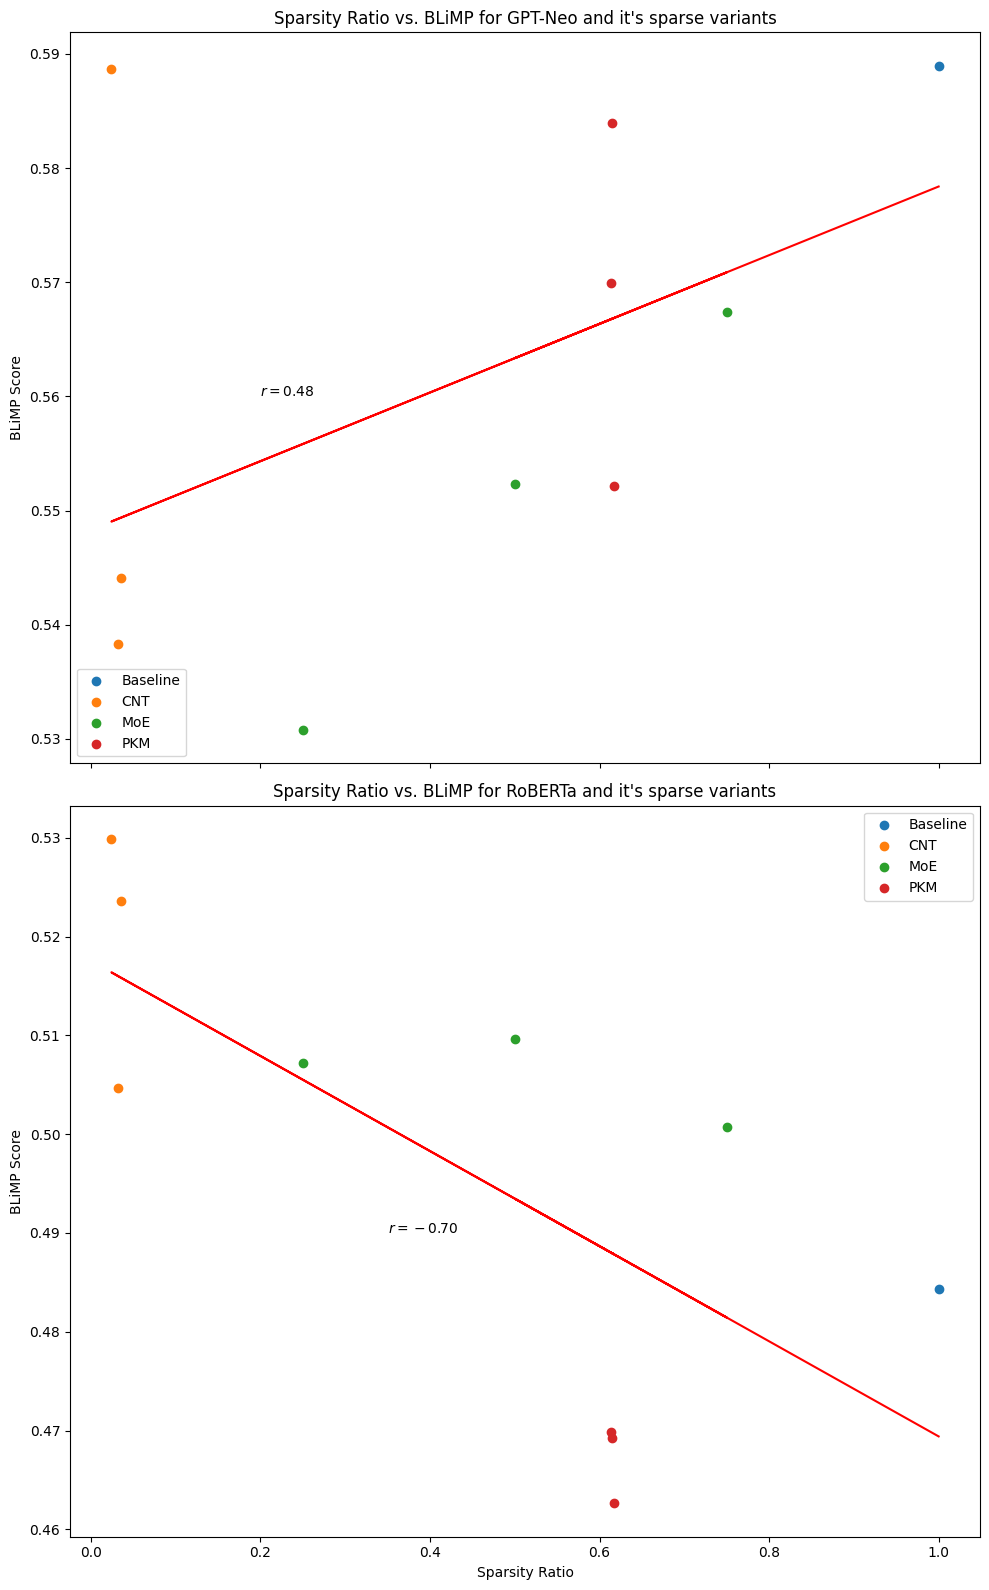

In [218]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16), sharex=True)

for group in np.unique(np.array([sparsity_type(col) for col in gpt_cols])): 
    ax1.scatter(gpt_blimp.loc['sparsity_ratio'][np.array([sparsity_type(col) for col in gpt_cols]) == group], gpt_blimp.loc['Overall'][np.array([sparsity_type(col) for col in gpt_cols]) == group], label=group)
slope, intercept, r_value, p_value, std_err = linregress(gpt_blimp.loc['sparsity_ratio'], gpt_blimp.loc['Overall'])
ax1.plot(gpt_blimp.loc['sparsity_ratio'], slope * gpt_blimp.loc['sparsity_ratio'] + intercept, color='red')
ax1.set_title("Sparsity Ratio vs. BLiMP for GPT-Neo and it's sparse variants")
#ax1.set_xlabel("Sparsity Ratio")
ax1.set_ylabel("BLiMP Score")
ax1.text(x=0.2, y = 0.56, s=f'$r={r_value:.2f}$')
ax1.legend()


for group in np.unique(np.array([sparsity_type(col) for col in roberta_cols])): 
    ax2.scatter(roberta_blimp.loc['sparsity_ratio'][np.array([sparsity_type(col) for col in roberta_cols]) == group], roberta_blimp.loc['Overall'][np.array([sparsity_type(col) for col in roberta_cols]) == group], label=group)
slope, intercept, r_value, p_value, std_err = linregress(roberta_blimp.loc['sparsity_ratio'], roberta_blimp.loc['Overall'])
ax2.plot(roberta_blimp.loc['sparsity_ratio'], slope * roberta_blimp.loc['sparsity_ratio'] + intercept, color='r')
ax2.set_title("Sparsity Ratio vs. BLiMP for RoBERTa and it's sparse variants")
ax2.text(x=0.35, y = 0.49, s=f'$r={r_value:.2f}$')
ax2.set_xlabel("Sparsity Ratio")
ax2.set_ylabel("BLiMP Score")
ax2.legend()

plt.tight_layout()
plt.show()


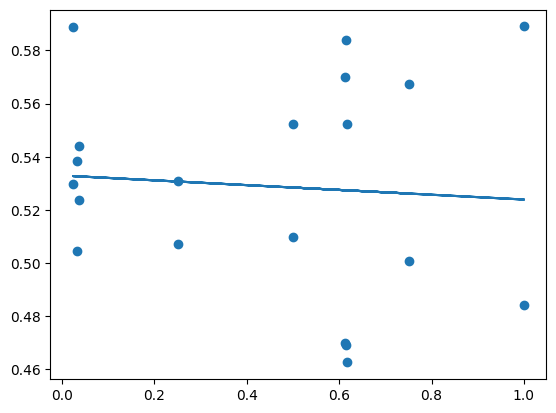

-0.07480196352009025


In [200]:
plt.scatter(blimp_scores.loc['sparsity_ratio'], blimp_scores.loc['Overall'])
slope, intercept, r_value, p_value, std_err = linregress(blimp_scores.loc['sparsity_ratio'], blimp_scores.loc['Overall'])
plt.plot(blimp_scores.loc['sparsity_ratio'], slope * blimp_scores.loc['sparsity_ratio'] + intercept)
plt.show()
print(r_value)

In [163]:
def name_conversion(name):
    arch = "GPT-Neo" if 'gpt' in name else "RoBERTa"
    if 'baseline' in name:
        return f"{arch}"
    if 'moe' in name:
        sparsity_type = 'MoE'
        if 'low' in name:
            sparsity_level = '($k=3$)'
        elif 'medium' in name:
            sparsity_level = '($k=2$)'
        else:
            sparsity_level = '($k=1$)'
            
    elif 'cnt' in name:
        sparsity_type = 'CNT'
        if 'low' in name:
            sparsity_level = '($N=64$)'
        elif 'medium' in name:
            sparsity_level = '($N=32$)'
        else:
            sparsity_level = '($N=16$)'
    elif 'pkm' in name:
        sparsity_type = 'PKM'
        if 'low' in name:
            sparsity_level = '($k=42$)'
        elif 'medium' in name:
            sparsity_level = '($k=28$)'
        else:
            sparsity_level = '($k=14$)'
    return f"{arch} {sparsity_type} {sparsity_level}"

In [125]:
gpt_eval_loss = pd.read_csv('gpt_eval_loss.csv')
gpt_eval_loss = gpt_eval_loss.drop(columns=[col for col in gpt_eval_loss.columns if 'MIN' in col or 'MAX' in col])
for col in gpt_eval_loss.columns:
    if col != 'Step':
        print(col, sparsity_ratio(col))

gpt_pkm_high - eval/loss 0.6134803921568628
gpt_pkm_medium - eval/loss 0.6151960784313726
gpt_pkm_low - eval/loss 0.6169117647058824
gpt_cnt_high - eval/loss 0.03615438447027323
gpt_cnt_medium - eval/loss 0.024239934264585046
gpt_cnt_low - eval/loss 0.024086404222024484
gpt_moe_low - eval/loss 0.7502435464935965
gpt_moe_high - eval/loss 0.25073063948078933
gpt_moe_medium - eval/loss 0.5004870929871928
gpt_baseline - eval/loss 1.0


In [90]:
gpt_eval_loss = pd.read_csv('gpt_eval_loss.csv')
gpt_eval_loss = gpt_eval_loss.drop(columns=[col for col in gpt_eval_loss.columns if 'MIN' in col or 'MAX' in col])
gpt_eval_loss = gpt_eval_loss.rename(columns={col: name_conversion(col) for col in gpt_eval_loss.columns if col != 'Step'})
gpt_eval_loss

,Step,GPT-Neo PKM ($k=14$),GPT-Neo PKM ($k=28$),GPT-Neo PKM ($k=42$),GPT-Neo CNT ($N=16$),GPT-Neo CNT ($N=32$),GPT-Neo CNT ($N=64$),GPT-Neo MoE ($k=3$),GPT-Neo MoE ($k=1$),GPT-Neo MoE ($k=2$),GPT-Neo
0,2,2.936840,2.926169,2.949441,3.062659,3.012976,3.089170,2.605631,2.893417,2.595905,2.497805
1,4,2.437337,2.442173,2.435794,2.596858,2.562127,2.580930,2.179572,2.394802,2.168495,2.107658
2,6,2.241107,2.258385,2.241023,2.379031,2.343688,2.349521,2.000344,2.191069,1.995769,1.956240
3,8,2.144249,2.155936,2.133947,2.266796,2.225472,2.223340,1.898287,2.077069,1.889923,1.868954
4,10,2.075456,2.094606,2.082344,2.190787,2.151990,2.145256,1.829374,2.004117,1.828218,1.809228
5,12,2.032396,2.042756,2.025907,2.133039,2.098104,2.085228,1.782302,1.954407,1.779705,1.768884
6,14,1.999849,2.001808,1.987986,2.094704,2.060910,2.044462,1.746865,1.916523,1.747702,1.737035
7,16,1.973594,1.980298,1.970253,2.062346,2.028554,2.010948,1.718215,1.886994,1.721087,1.711763
8,18,1.954516,1.950917,1.941804,2.035494,2.003703,1.985014,1.695609,1.862404,1.697259,1.689958
9,20,1.939212,1.935175,1.922171,2.011276,1.983479,1.961584,1.676054,1.842870,1.678740,1.672484


In [91]:
roberta_eval_loss = pd.read_csv('roberta_eval_loss.csv')
roberta_eval_loss = roberta_eval_loss.drop(columns=[col for col in roberta_eval_loss.columns if 'MIN' in col or 'MAX' in col])
roberta_eval_loss = roberta_eval_loss.rename(columns={col: name_conversion(col) for col in roberta_eval_loss.columns if col != 'Step'})
roberta_eval_loss

,Step,RoBERTa PKM ($k=14$),RoBERTa PKM ($k=28$),RoBERTa PKM ($k=42$),RoBERTa CNT ($N=16$),RoBERTa CNT ($N=32$),RoBERTa CNT ($N=64$),RoBERTa MoE ($k=1$),RoBERTa MoE ($k=2$),RoBERTa MoE ($k=3$),RoBERTa
0,2,0.008501,0.008468,0.008464,0.008770,0.008418,0.008804,0.008513,0.007983,0.007673,0.005542
1,4,0.002718,0.002710,0.002707,0.002663,0.002621,0.002658,0.003312,0.003019,0.003700,0.001779
2,6,0.001352,0.001348,0.001347,0.001306,0.001298,0.001256,0.002135,0.001861,0.002426,0.000881
3,8,0.000806,0.000804,0.000803,0.000777,0.000771,0.000747,0.001678,0.001134,0.002591,0.000526
4,10,0.000532,0.000530,0.000529,0.000511,0.000509,0.000489,0.001471,0.000727,0.001417,0.000347
5,12,0.000381,0.000379,0.000379,0.000367,0.000362,0.000353,0.001374,0.000570,0.001478,0.000249
6,14,0.000286,0.000284,0.000284,0.000272,0.000268,0.000263,0.001438,0.000353,0.000966,0.000185
7,16,0.000221,0.000220,0.000220,0.000209,0.000206,0.000204,0.001454,0.000266,0.001755,0.000142
8,18,0.000173,0.000172,0.000172,0.000162,0.000160,0.000157,0.001486,0.000186,0.000779,0.000109
9,20,0.000142,0.000141,0.000141,0.000132,0.000130,0.000128,0.001558,0.000157,0.001032,0.000089


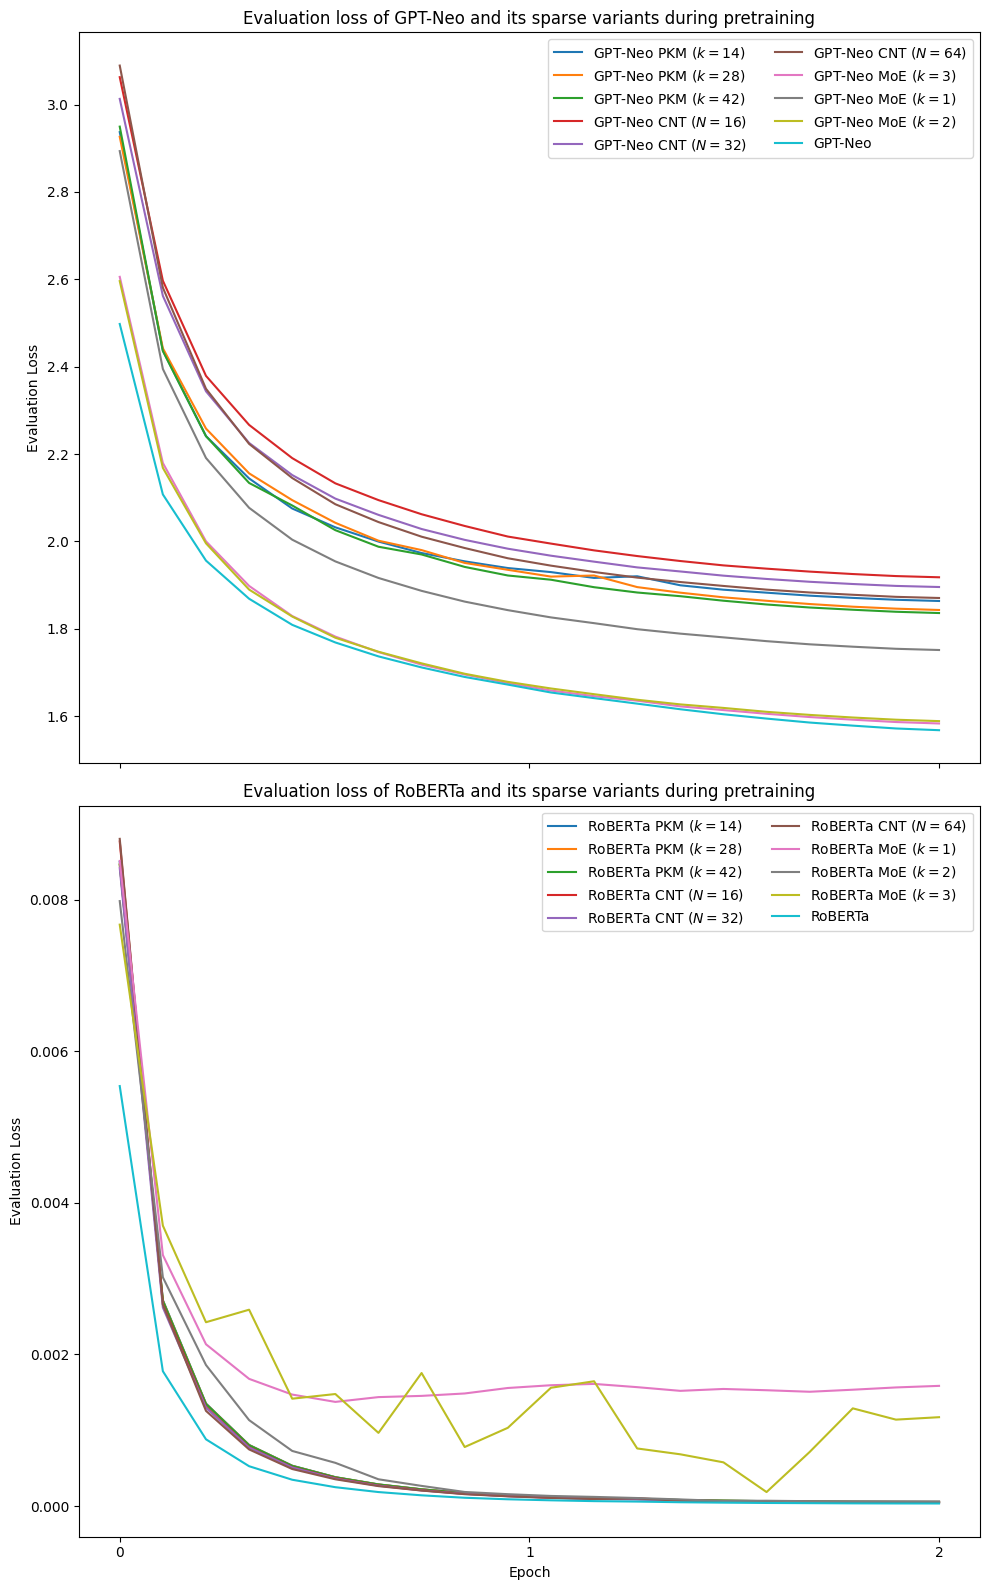

In [103]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16), sharex=True)

for column in gpt_eval_loss.columns:
    if column != 'Step':
        ax1.plot(np.linspace(0,2,num=20), gpt_eval_loss[column], label=column)
        
for column in roberta_eval_loss.columns:
    if column != 'Step':    
        ax2.plot(np.linspace(0,2,num=20), roberta_eval_loss[column], label=column)

ax2.set_xlabel('Epoch')
ax1.set_ylabel('Evaluation Loss')
ax2.set_ylabel('Evaluation Loss')
ax1.set_title('Evaluation loss of GPT-Neo and its sparse variants during pretraining')
ax2.set_title('Evaluation loss of RoBERTa and its sparse variants during pretraining')
ax1.legend(ncol=2)
ax2.legend(ncol=2)
ax1.set_xticks([0, 1, 2])
plt.tight_layout()
plt.show()